In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib notebook

# 3.1. - ПОЛИНОМИАЛЬНАЯ ИНТЕРПОЛЯЦИЯ

In [64]:
def omega(list_x: list, xi):
    ans = 1
    for x in list_x:
        if x - xi != 0:
            ans *= (x - xi)
    return ans


def Lagrange(list_f, list_x, x):
    Ln = 0
    for i in range(len(list_f)):
        Ln += list_f[i] * omega(list_x, x) / (x - list_x[i]) / omega(list_x, list_x[i])
    
    return -Ln


def split_difference(list_f, list_x):
    result = [list_f]
    for i in range(0, len(list_f) - 1):
        local_result = []
        for j in range(len(result[i]) - 1):
            diff = (result[i][j] - result[i][j + 1]) / (list_x[j] - list_x[j + i + 1])
            local_result.append(diff)
            
        result.append(local_result)
        
    return result
    
    
def x_mult(list_x, x, n):
    result = 1
    for i in range(n):
        result *= (x - list_x[i])
        
    return result

    
def Newton(list_f, list_x, x):
    Pn = 0
    diff_list = split_difference(list_f, list_x)
    for i in range(len(diff_list)):
        Pn += x_mult(list_x, x, i) * diff_list[i][0]
        
    return Pn
    
    
def error_rate(f, Pn, x):
    return math.fabs(f(x) - Pn(x))

In [65]:
pi = math.pi
y = lambda x: math.tan(x)

Xa = [i*pi/8 for i in range(4)]
Ya = [y(x) for x in Xa]
Xb = [0, pi/8, pi/3, 3*pi/8]
Yb = [y(x) for x in Xb]

X = 3 * pi / 16

In [66]:
print(y(X))
print()
print(Lagrange(Ya, Xa, X), error_rate(y, lambda x: Lagrange(Ya, Xa, x), X))
print(Newton(Ya, Xa, X), error_rate(y, lambda x: Newton(Ya, Xa, x), X))
print()
print(Lagrange(Yb, Xb, X), error_rate(y, lambda x: Lagrange(Yb, Xb, x), X))
print(Newton(Yb, Xb, X), error_rate(y, lambda x: Newton(Yb, Xb, x), X))

0.6681786379192989

0.6446067811865475 0.023571856732751417
0.6446067811865476 0.023571856732751306

0.5852508288281992 0.08292780909109965
0.5852508288281993 0.08292780909109954


<IPython.core.display.Javascript object>


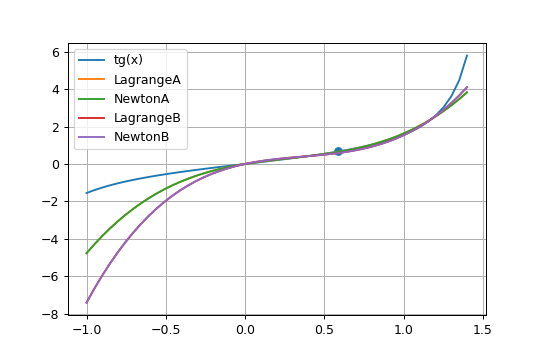

In [71]:
x = np.linspace(-1, 1.4)
y1 = [y(i) for i in x]
y2 = [Lagrange(Ya, Xa, i) for i in x]
y3 = [Newton(Ya, Xa, i) for i in x]
y4 = [Lagrange(Yb, Xb, i) for i in x]
y5 = [Newton(Yb, Xb, i) for i in x]

plt.grid()
plt.plot(x, y1, label='tg(x)')
plt.plot(x, y2, label='LagrangeA')
plt.plot(x, y3, label='NewtonA')
plt.plot(x, y4, label='LagrangeB')
plt.plot(x, y5, label='NewtonB')
plt.scatter(X, y(X))
plt.legend()
plt.grid(True)

# СПЛАЙН - ИНТЕРПОЛЯЦИЯ

In [ ]:
def Progonka(arr) -> list:
    A = [[arr[i][j] for j in range(len(arr[i]))] for i in range(len(arr))]
    n = len(A)

    #   Формирование массивов чисел a, b, c, d _____________
    #   a = [a0, a1, a2, ..., a_n]
    a, b, c, d = [0], [arr[0][0]], [arr[0][1]], [arr[0][2]]
    for i in arr[1:-1]:
        a.append(i[0])
        b.append(i[1])
        c.append(i[2])
        d.append(i[3])

    a.append(arr[-1][0])
    b.append(arr[-1][1])
    c.append(0)
    d.append(arr[-1][2])

    for i in range(n):
        if math.fabs(b[i]) < math.fabs(a[i]) + math.fabs(c[i]):
            raise Exception

    #   Формирование массивов P, Q (Расчет значений) ((Прямой ход))

    P, Q = [-c[0] / b[0]], [d[0] / b[0]]

    for i in range(1, n):
        P.append(-c[i] / (b[i] + a[i] * P[i - 1]))
        Q.append((d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1]))

    #   Вычисление решения системы (Обратный ход)
    x = [Q[n - 1]]
    for i in range(1, n):
        x.append(P[n - 1 - i] * x[i - 1] + Q[n - 1 - i])

#     print('P:')
#     print(np.array(P))
#     print('Q:')
#     print(np.array(Q))

    x = reversed(x)
    return x


def spline_interpolations(list_f: list, list_x: list, x):
    n = len(list_f)
    h = lambda i: list_x[i] - list_x[i-1]
    
    h1 = list_x[1] - list_x[0]
    h2 = list_x[2] - list_x[1]
    c_slau = [[2*(h1 + h2), h2, 3*((list_f[2] - list_f[1])/h2 - (list_f[1] - list_f[0])/h1)]]
    for i in range(2, n - 1):
        hi_prev = list_x[i-1] - list_x[i-2]
        hi = list_x[i] - list_x[i-1]
        hi_next = list_x[i+1] - list_x[i]
        
        equation = [h(i-1), 2*(h(i) - h(i-1)), h(i), 3*((list_f[i] - list_f[i-1])/h(i) - (list_f[i-1] - list_f[i-2])/h(i-1))]
        c_slau.append(equation)
        
    equation = [h(n-2), 2*(h(n-2) - h(n-1)), ((list_f[n-1] - list_f[n-2])/h(n-1) - (list_f[n-2] - list_f[n-3])/h(n-2))]
    c_slau.append(equation)
    c = [0]
    c.extend(Progonka(c_slau))
    
    a = [i for i in list_f]
    
    b = [(list_f[i] - list_f[i-1])/(h(i)) - (h(i))*(с[i+1] - 2*c[i]) for i in range(1, n-1)]
    b.append((list_f[n-1] - list_f[n-2])/(h(n-1)) - 2*h(n-1)*c[n-1]/3)
    
    d = [(c[i+1] - c[i])/3/h(i) for i in range(1, n-1)]
    d.append(-c[n-1]/3/h(n-1))
        